In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
import json

import glob
import random
import collections
from glob import glob
import numpy as np
import pandas as pd

#import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import shutil
import keras
from PIL import Image
#import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
import json
import tensorflow as tf 
from keras.layers import Input
from keras import Sequential
from keras.layers import Dense, LSTM,Flatten, TimeDistributed, Conv2D, Dropout
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import re
import string

from keras.models import load_model
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D,Reshape, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten, UpSampling2D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Lambda, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import Input
from keras.layers import TimeDistributed, Conv2D, Dense, MaxPooling2D, Flatten, LSTM, Dropout, BatchNormalization
from keras import models
AUTO = tf.data.AUTOTUNE
from sklearn.metrics import confusion_matrix
import random

AUTO = tf.data.AUTOTUNE
BATCH_SIZE = 32
EPOCHS = 50
CROP_TO = 32
SEED = 26

PROJECT_DIM = 128
LATENT_DIM = 256
WEIGHT_DECAY = 0.0005
learning_rate = 0.0001
batch_size = 64
hidden_units = 256
projection_units = 128
num_epochs = 2
dropout_rate = 0.5

temperature = 0.05

C:\Users\chowd\AppData\Roaming\Python\Python39\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.7.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [2]:
from glob import glob
import cv2

trn1='D:/data/invasive-aquatic-species-data/noninvasive/*/'
trn2='D:/data/Veligers/To Baylor 2023-01-30/To Baylor 2023-01-30/Ostracod Image1/*/'
trn3='D:/data/invasive-aquatic-species-data/invasive/*/'

tr1= glob(trn1)
tr2= glob(trn2)
tr3= glob(trn3)


In [3]:
print(len(tr1),len(tr2),len(tr3),(len(tr1)+len(tr2)+len(tr3)))

3700 19 674 4393


In [3]:
from sklearn.utils import shuffle
tr1 = shuffle(tr1)
tr2 = shuffle(tr2)
tr3 = shuffle(tr3)
tran_index_noninv = np.round( len(tr1)* .6  )
tran_index_osc = np.round( len(tr2)* .7  )
tran_index_inv = np.round( len(tr3)* .7  )
tran_index_inv

472.0

897.0

In [ ]:
data = []
label = []
for i in tr1[:(int) (tran_index_noninv)]:
    for j in glob(i+'/*'):
        data.append(j)
        label.append(0)


for i in tr2[:(int)(tran_index_osc)]:
    for j in glob(i+'/*'):
        data.append(j)
        label.append(1)
        
for i in tr3[:(int)(tran_index_inv)]:
    for j in glob(i+'/*'):
        data.append(j)
        label.append(2)

imgdata=[]
for i in range(len(data)):
    a = Image.open(data[i])
    b = tf.image.resize_with_crop_or_pad(tf.keras.preprocessing.image.img_to_array(a), 30, 30)
    c = np.array(b)
    imgdata.append(c.reshape(30,30,3))
    

In [ ]:
from tensorflow.keras.utils import to_categorical
idata = np.array(imgdata)
X_train = idata
X_train = X_train.astype('float32') / 255.
X_train = np.reshape(X_train, (len(X_train),30,30,3))
# One hot vector representation of labels
Y_train = to_categorical (label)

X_train,Y_train = shuffle(X_train,Y_train)

In [ ]:
data = []
label = []
for i in tr1[(int) (tran_index_noninv) + 1 :]:
    for j in glob(i+'/*'):
        data.append(j)
        label.append(0)


for i in tr2[(int)(tran_index_osc) + 1 :]:
    for j in glob(i+'/*'):
        data.append(j)
        label.append(1)
        
for i in tr3[(int)(tran_index_inv) + 1 :]:
    for j in glob(i+'/*'):
        data.append(j)
        label.append(2)

imgdata=[]
for i in range(len(data)):
    a = Image.open(data[i])
    b = tf.image.resize_with_crop_or_pad(tf.keras.preprocessing.image.img_to_array(a), 30, 30)
    c = np.array(b)
    imgdata.append(c.reshape(30,30,3))
    

In [ ]:
from tensorflow.keras.utils import to_categorical
idata = np.array(imgdata)
X_test = idata
X_test = X_test.astype('float32') / 255.
X_test = np.reshape(X_test, (len(X_test),30,30,3))
# One hot vector representation of labels
Y_test = to_categorical(label)

X_test,Y_test = shuffle(X_test , Y_test)

In [ ]:
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

def get_f1(y_true, y_pred): #taken from old keras source code
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    tn = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1-y_true) * (y_pred), 0, 1)))
    fn = K.sum(K.round(K.clip((y_true) * (1-y_pred), 0, 1)))
    

    f1_val = tp / ( tp + ( (1/2) * (fp+fn) ) + K.epsilon())
    return f1_val

import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), input_shape=(30, 30, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.Flatten()) 
model.add(layers.Dense(64))
model.add(layers.Dense(10))
model.add(layers.Dense(3, activation="softmax"))
model.summary()

In [15]:
len(X_train)

142352

In [ ]:
#The hardcoded number is for train/val split

batch_size = 16

# Create a dataset for the training data
train_dataset = tf.data.Dataset.from_tensor_slices((X_train[:120000], Y_train[:120000].astype('float32')))

# Shuffle, batch, and repeat the dataset for training
train_dataset = train_dataset.shuffle(buffer_size=len(X_train))
train_dataset = train_dataset.batch(batch_size)
train_dataset = train_dataset.repeat()

# Create a dataset for the validation/test data
val_dataset = tf.data.Dataset.from_tensor_slices((X_train[120000:], Y_train[120000:].astype('float32')))

# Batch the dataset for validation/test
val_dataset = val_dataset.batch(batch_size)

# Now, you can use the `train_dataset` and `val_dataset` to train and validate your Keras model.

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=([get_f1]))
model.fit(train_dataset,  
          validation_data=val_dataset,  
          epochs=50)


In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=([get_f1]))
model.fit( np.array(X_train) , np.array(Y_train).astype('float32') , epochs=50, batch_size=32, validation_split = .3, verbose = 1)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

te_df = model.predict(np.array(X_test),batch_size=16)
y_pred = np.argmax(te_df, axis=1)
y_true = np.argmax(Y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)


# plot confusion matrix as heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.show()

In [42]:
import tensorflow as tf
from keras.models import load_model

# Define the custom object function
def get_f1(y_true, y_pred):
    # Custom F1 score calculation
    # Define your custom F1 score implementation here
    return f1_score

# Load the model with the custom object function
model = load_model('my_model.h5', custom_objects={'get_f1': get_f1})


In [ ]:
from tensorflow.keras.models import load_model

#os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
model.save('my_model.h5')


In [9]:


from sklearn.metrics import f1_score

# Calculate F1 score for class 1
f1_class1 = f1_score(y_true, y_pred, labels=[0], average='macro')
print("F1 score for class 1: {:.2f}%".format(f1_class1 * 100))



F1 score for class 1: 97.70%


In [54]:
trn10='D:/data/Veligers/Preserved Zebra Ped 1 To Baylor/Preserved Zebra Ped 1 To Baylor/Sorted Images/Not/*/'
trn11='E:/USGS Labled Zebra/USGS Labled Zebra/Preserved Zebra D-Hinge 1 Baylor/Preserved Zebra D-Hinge 1 Baylor/Sorted Images/Not/*/'
trn12='E:/USGS Labled Zebra/USGS Labled Zebra/Baylor Preserved Zebra Umbo 1a Image1/Baylor Preserved Zebra Umbo 1a Image1/Sorted Images/Not/*/'
trn13='D:/data/Veligers/Preserved Zebra Ped 1 To Baylor/Preserved Zebra Ped 1 To Baylor/Sorted Images/Not/*/'
trn14='D:/data/Veligers/Preserved Zebra Ped 1a To Baylor/Preserved Zebra Ped 1a To Baylor/Sorted Images/Not/*/'

tr1= glob(trn10)
tr= glob(trn11)
tr1.extend(tr)
tr= glob(trn12)
tr1.extend(tr)
tr= glob(trn13)
tr1.extend(tr)
tr= glob(trn14)
tr1.extend(tr)



trn20='E:/USGS Labled Zebra/USGS Labled Zebra/Preserved Zebra D-Hinge 1 Baylor/Preserved Zebra D-Hinge 1 Baylor/Sorted Images/Ostracod/*/'
trn21='D:/data/Ostracod/Ostracod Day 2 Image12 Short To Baylor/Ostracod Day 2 Image12 To Baylor/Sorted Images/Ostracods/*/'
trn22='D:/data/Ostracod/Ostracods Day 2 Image1 To Baylor/Ostracods Day 2 Image1 To Baylor/Sorted Images/Ostracods/*/'
trn23='D:/data/Ostracod/Ostracods Day 2 Image2 To Baylor/Ostracods Day 2 Image2 To Baylor/Sorted Images/Ostracods/*/'
trn24='D:/data/Ostracod/Ostracods Day 2 Image3 To Baylor/Ostracods Day 2 Image3 To Baylor/Sorted Images/Ostracods/*/'
trn25='D:/data/Ostracod/Ostracods Day 2 Image12 To Baylor/Ostracods Day 2 Image12 To Baylor/Sorted Images/Ostracods/*/'
trn26='D:/data/Ostracod/Preserved Ostracods 1 To Baylor/Preserved Ostracods 1 To Baylor/Sorted Images/Preserve Ostracods/*/'
trn27='D:/data/Ostracod/Preserved Ostracods 1a To Baylor/Preserved Ostracods 1a To Baylor/Sorted Images/Preserved Ostracods 1a/*/'

tr2= glob(trn20)
tr= glob(trn21)
tr2.extend(tr)
tr= glob(trn22)
tr2.extend(tr)
tr= glob(trn23)
tr2.extend(tr)
tr= glob(trn24)
tr2.extend(tr)
tr= glob(trn25)
tr2.extend(tr)
tr= glob(trn26)
tr2.extend(tr)
tr= glob(trn27)
tr2.extend(tr)



trn30='E:/USGS Labled Zebra/USGS Labled Zebra/Preserved Zebra D-Hinge 1 Baylor/Preserved Zebra D-Hinge 1 Baylor/Sorted Images/Zebra D-Hinge/*/'

tr3= glob(trn30)


trn40='E:/USGS Labled Zebra/USGS Labled Zebra/Baylor Preserved Zebra Umbo 1a Image1/Baylor Preserved Zebra Umbo 1a Image1/Sorted Images/Umbonal/*/'
trn41='E:/USGS Labled Zebra/USGS Labled Zebra/Baylor Preserved Zebra Umbo 1 Image1/Baylor Preserved Zebra Umbo 1 Image1/Sorted Images/Umbonal/*/'

tr4= glob(trn40)
tr= glob(trn41)
tr4.extend(tr)




trn50='D:/data/Veligers/Preserved Zebra Ped 1 To Baylor/Preserved Zebra Ped 1 To Baylor/Sorted Images/Pedi-Zebra Veligers/*/'
trn51='D:/data/Veligers/Preserved Zebra Ped 1a To Baylor/Preserved Zebra Ped 1a To Baylor/Sorted Images/Preserved Zebra Ped 1a/*/'

tr5= glob(trn50)
tr= glob(trn51)
tr5.extend(tr)


In [55]:
from sklearn.utils import shuffle
tr1 = shuffle(tr1)
tr4 = shuffle(tr4)
tr5 = shuffle(tr5)
tran_index_noninv = np.round( len(tr1)* .7  )
tran_index_osc = np.round( len(tr2)* .7  )
tran_index_inv = np.round( len(tr3)* .7  )
tran_index_dh = np.round( len(tr4)* .7  )
tran_index_obm = np.round( len(tr5)* .7  )

tran_index_obm

84.0

In [56]:
data = []
label = []

for i in tr1[:(int) (tran_index_noninv)]:
    for j in glob(i+'/*'):
        data.append(j)
        label.append(0)


for i in tr2[:(int)(tran_index_osc)]:
    for j in glob(i+'/*'):
        data.append(j)
        label.append(1)
        
for i in tr3[:(int)(tran_index_inv)]:
    for j in glob(i+'/*'):
        data.append(j)
        label.append(2)


for i in tr2[:(int)(tran_index_dh)]:
    for j in glob(i+'/*'):
        data.append(j)
        label.append(3)
        
for i in tr3[:(int)(tran_index_obm)]:
    for j in glob(i+'/*'):
        data.append(j)
        label.append(4)

imgdata=[]
for i in range(len(data)):
    a = Image.open(data[i])
    b = tf.image.resize_with_crop_or_pad(tf.keras.preprocessing.image.img_to_array(a), 30, 30)
    c = np.array(b)
    imgdata.append(c.reshape(30,30,3))
    

In [57]:
from tensorflow.keras.utils import to_categorical
idata = np.array(imgdata)
X_train = idata
X_train = X_train.astype('float32') / 255.
X_train = np.reshape(X_train, (len(X_train),30,30,3))
# One hot vector representation of labels
Y_train = to_categorical (label)

X_train,Y_train = shuffle(X_train,Y_train)

In [58]:
data = []
label = []

for i in tr1[(int) (tran_index_noninv) + 1 :]:
    for j in glob(i+'/*'):
        data.append(j)
        label.append(0)


for i in tr2[(int)(tran_index_osc) + 1 :]:
    for j in glob(i+'/*'):
        data.append(j)
        label.append(1)
        
for i in tr3[(int)(tran_index_inv) + 1 :]:
    for j in glob(i+'/*'):
        data.append(j)
        label.append(2)


for i in tr2[(int)(tran_index_dh) + 1 :]:
    for j in glob(i+'/*'):
        data.append(j)
        label.append(3)
        
for i in tr3[(int)(tran_index_obm) + 1 :]:
    for j in glob(i+'/*'):
        data.append(j)
        label.append(4)

imgdata=[]
for i in range(len(data)):
    a = Image.open(data[i])
    b = tf.image.resize_with_crop_or_pad(tf.keras.preprocessing.image.img_to_array(a), 30, 30)
    c = np.array(b)
    imgdata.append(c.reshape(30,30,3))
    

In [59]:
from tensorflow.keras.utils import to_categorical
idata = np.array(imgdata)
X_test1 = idata
X_test1 = X_test1.astype('float32') / 255.
X_test1 = np.reshape(X_test1, (len(X_test1),30,30,3))
# One hot vector representation of labels
Y_test1 = to_categorical(label)

X_test1,Y_test1 = shuffle(X_test1 , Y_test1)

In [61]:
len(X_test1)

5867

In [63]:
np.shape(Y_train)

(15013, 5)

In [64]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense


def get_f1(y_true, y_pred): #taken from old keras source code
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    tn = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1-y_true) * (y_pred), 0, 1)))
    fn = K.sum(K.round(K.clip((y_true) * (1-y_pred), 0, 1)))
    

    f1_val = tp / ( tp + ( (1/2) * (fp+fn) ) + K.epsilon())
    return f1_val


# Remove the last layer
new_model_layers = model.layers[:-1]

# Add a new Dense layer for classification with 5 classes
num_classes = 5
new_output = Dense(num_classes, activation='softmax',name="final")(new_model_layers[-1].output)

# Create a new model with the modified architecture
new_model = Model(inputs=model.input, outputs=new_output)

new_model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 30, 30, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          3692

In [65]:
new_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=([get_f1]))
new_model.fit( np.array(X_train) , np.array(Y_train).astype('float32') , epochs=50, batch_size=32, validation_split = .3, verbose = 1)

Epoch 1/50
329/329 [==============================] - 3s 8ms/step - loss: 3.4579 - get_f1: 0.4920 - val_loss: 0.7491 - val_get_f1: 0.5867
Epoch 2/50
329/329 [==============================] - 3s 8ms/step - loss: 0.6930 - get_f1: 0.5951 - val_loss: 0.6695 - val_get_f1: 0.5981
Epoch 3/50
329/329 [==============================] - 3s 10ms/step - loss: 0.6317 - get_f1: 0.6071 - val_loss: 0.6359 - val_get_f1: 0.5968
Epoch 4/50
329/329 [==============================] - 3s 10ms/step - loss: 0.5926 - get_f1: 0.6234 - val_loss: 0.6093 - val_get_f1: 0.6048
Epoch 5/50
329/329 [==============================] - 3s 10ms/step - loss: 0.5745 - get_f1: 0.6276 - val_loss: 0.5940 - val_get_f1: 0.6162
Epoch 6/50
329/329 [==============================] - 3s 10ms/step - loss: 0.5594 - get_f1: 0.6379 - val_loss: 0.6332 - val_get_f1: 0.6169
Epoch 7/50
329/329 [==============================] - 3s 10ms/step - loss: 0.5526 - get_f1: 0.6344 - val_loss: 0.5850 - val_get_f1: 0.6107
Epoch 8/50
329/329 [=========

In [66]:
from tensorflow.keras.models import load_model

#os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
#new_model.save('new_model.h5')


In [ ]:
import tensorflow as tf
from keras.models import load_model

# Define the custom object function
def get_f1(y_true, y_pred):
    # Custom F1 score calculation
    # Define your custom F1 score implementation here
    return f1_score

# Load the model with the custom object function
#new_model = load_model('new_model.h5', custom_objects={'get_f1': get_f1})

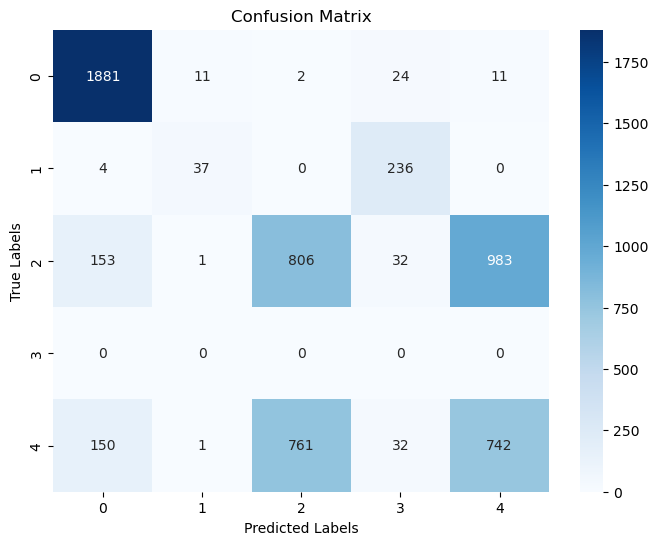

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

te_df = new_model.predict(np.array(X_test),batch_size=16)
y_pred = np.argmax(te_df, axis=1)
y_true = np.argmax(Y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)


# plot confusion matrix as heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.show()

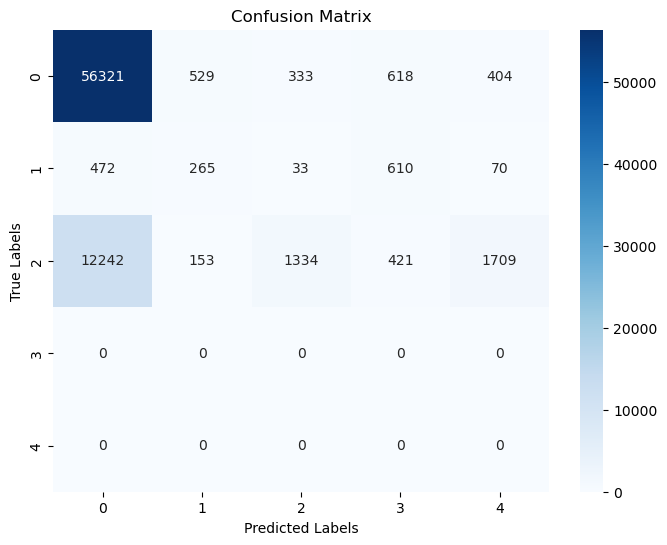

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

te_df = new_model.predict(np.array(X_test),batch_size=16)
y_pred = np.argmax(te_df, axis=1)
y_true = np.argmax(Y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)


# plot confusion matrix as heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.show()